In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font',  family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

# 1.Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [2]:
pd.set_option('display.max_columns',None)
# df_raw = pd.read_csv('wo_thin.csv', engine='python', encoding='cp949')
df_raw = pd.read_csv('df_final.csv', engine='python')#, encoding='cp949')

In [3]:
df_raw.columns

Index(['chaju_id', 'credit_class', 'score_risk', 'gender', 'age', 'agegroup',
       'job', 'edu', 'dwell_type', 'house_type', 'marriage', 'income_home_grp',
       'income_ind_grp', 'expenditure_grp', 'child_cd', 'no_child',
       'flag_priv_biz_cd', 'net_income', 'family_size', 'income_person',
       'card_count', 'loan_amt', 'loan_dur', 'loan_count', 'over_amt',
       'over_dur', 'over_count', 'is_overdue', 'sum_loan_at_time',
       'sum_cashservice_3y', 'sum_cardloan_3y', 'no_cashservice_3y',
       'no_cardloan_3y', 'no_creditcard_over', 'sum_creditcard_over',
       'max_loan_amt', 'max_over_amt', 'income_ind_test', 'expend_ind_test',
       'ind_net_income', 'loan_at_time_div_by_net', 'cardloan_no_diff_com',
       'cashservice_no_diff_com'],
      dtype='object')

In [4]:
# 1. Í∏∞Ï°¥ Î™®Îç∏Í≥ºÏùò KSÌÜµÍ≥ÑÎüâ ÎπÑÍµêÏãú ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞: Í∏∞Ï°¥ Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©Ìïú Î≥ÄÏàòÎì§Í≥º ÎπÑÏä∑Ìïú Î≥ÄÏàòÎì§Îßå ÏÇ¨Ïö©ÌïòÎäî Î≤ÑÏ†Ñ
# data=df_raw[['is_overdue','agegroup','job','edu','dwell_type','house_type','marriage',
#              'income_home_grp','expenditure_grp','card_count','loan_count',
#               'flag_priv_biz_cd', 'loan_amt',
#              'over_count','over_amt']]
# data['loan_amt']=np.log10(data['loan_amt']+1) # Í∏àÏï°Ïùò Î≤îÏúÑÍ∞Ä ÎÑàÎ¨¥ Îã§ÏñëÌïòÎØÄÎ°ú logÎ°ú Î≥ÄÌôò + Í∏àÏï°Ïù¥0Ïùº Í≤ΩÏö∞ log ÏóêÎü¨ Î∞©ÏßÄÎ•º ÏúÑÌï¥ +1
# data['over_amt']=np.log10(data['over_amt']+1)

# 2. ÏµúÏ¢Ö Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞: Í∏∞Ï°¥ Î™®Îç∏ Î≥ÄÏàòÎì§ - (ÎåÄÏ∂úÍ∏àÏï°, Ïó∞Ï≤¥Í∏àÏï°) + ÌååÏÉù Î≥ÄÏàò
data = df_raw[['gender','agegroup','job','edu','dwell_type', 'house_type', 'flag_priv_biz_cd', 'card_count', 'loan_dur','loan_count',
 'over_dur', 'over_count', 'is_overdue', 'loan_at_time_div_by_net', 'cardloan_no_diff_com', 'cashservice_no_diff_com']]

In [5]:
list(data.columns)

['gender',
 'agegroup',
 'job',
 'edu',
 'dwell_type',
 'house_type',
 'flag_priv_biz_cd',
 'card_count',
 'loan_dur',
 'loan_count',
 'over_dur',
 'over_count',
 'is_overdue',
 'loan_at_time_div_by_net',
 'cardloan_no_diff_com',
 'cashservice_no_diff_com']

# 2. Ordinal encoding
Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§Ïùò Î≥ÄÌôò

In [6]:
numerical_feats = data.dtypes[data.dtypes != "object"].index.tolist()
numerical_feats.remove('is_overdue')
print(numerical_feats)
print("Number of Numerical features: ", len(numerical_feats))
print('\n')

categorical_feats = data.dtypes[data.dtypes == "object"].index.tolist()
print(categorical_feats)
print("Number of Categorical features: ", len(categorical_feats))

['card_count', 'loan_dur', 'loan_count', 'over_dur', 'over_count', 'loan_at_time_div_by_net', 'cardloan_no_diff_com', 'cashservice_no_diff_com']
Number of Numerical features:  8


['gender', 'agegroup', 'job', 'edu', 'dwell_type', 'house_type', 'flag_priv_biz_cd']
Number of Categorical features:  7


In [7]:
from category_encoders.ordinal import OrdinalEncoder
encoder = OrdinalEncoder(categorical_feats)
data[categorical_feats] = encoder.fit_transform(data[categorical_feats], data['is_overdue'])

/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# train, test Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [8]:
df_raw_y=data["is_overdue"]
df_raw_x=data.drop("is_overdue",axis=1,inplace=False)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x, df_raw_y,stratify=df_raw_y,test_size=0.3,random_state=100)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(1294, 15)
train data Y size :(1294,)
test data X size :(555, 15)
test data Y size :(555,)


# 3. RF Î™®Îç∏ ÏÉùÏÑ±
### Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä: Ïó∞Ï≤¥ Ïó¨Î∂Ä ÏòàÏ∏°Î†• (f1-score): 81%

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_final = RandomForestClassifier(min_samples_leaf=30,min_samples_split=10,max_depth=4,n_estimators=100, random_state=1234)
rf_final.fit(df_train_x,df_train_y)
y_pred = rf_final.predict(df_test_x)

In [10]:
print("Accuracy on training set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("\nAccuracy on test set\n:{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set:0.947
Accuracy on test set:0.932

Accuracy on test set
:[[436  25]
 [ 13  81]]
              precision    recall  f1-score   support

         0.0      0.971     0.946     0.958       461
         1.0      0.764     0.862     0.810        94

    accuracy                          0.932       555
   macro avg      0.868     0.904     0.884       555
weighted avg      0.936     0.932     0.933       555



In [11]:
v_feature_name=df_train_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)


Feature  Importance
10                 over_dur       0.427
11               over_count       0.394
7                card_count       0.067
9                loan_count       0.024
14  cashservice_no_diff_com       0.018
12  loan_at_time_div_by_net       0.017
8                  loan_dur       0.017
0                    gender       0.015
13     cardloan_no_diff_com       0.008
3                       edu       0.004
1                  agegroup       0.004
5                house_type       0.003
2                       job       0.002
4                dwell_type       0.001
6          flag_priv_biz_cd       0.001

Text(0, 0.5, 'ÏÑ§Î™ÖÎ≥ÄÏàò')

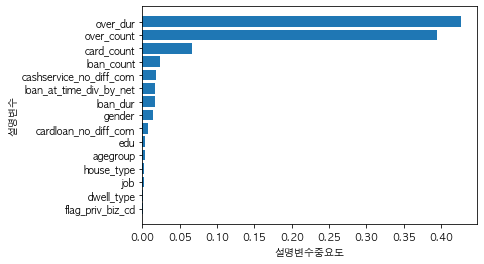

In [12]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("ÏÑ§Î™ÖÎ≥ÄÏàòÏ§ëÏöîÎèÑ")
plt.ylabel("ÏÑ§Î™ÖÎ≥ÄÏàò")

# 4.RFÎ™®Îç∏Ïù¥ Í≥ÑÏÇ∞Ìïú probabilityÎ•º ÏÇ¨Ïö©Ìïú Ï∞®Ï£º Ïã†Ïö©Ï†êÏàò ÎèÑÏ∂ú

In [13]:
prob = rf_final.predict_proba(df_raw_x)
prob

array([[0.8890944 , 0.1109056 ],
       [0.94934646, 0.05065354],
       [0.93998944, 0.06001056],
       ...,
       [0.98130778, 0.01869222],
       [0.97238672, 0.02761328],
       [0.87564388, 0.12435612]])

Text(0.5, 1.0, 'RF Î∂ÑÎ•ò Î™®Îç∏')

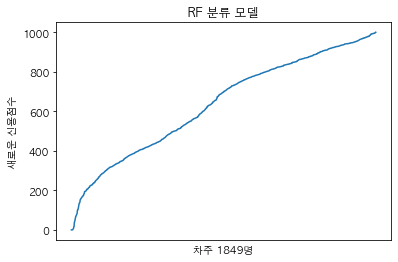

In [14]:
'''
# Ïó∞Ï≤¥Ìï† ÌôïÎ•†(y=1Ïùº ÌôïÎ•†) Î∂ÑÌè¨Î•º ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò Ï†ÅÏö©ÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàò(new_score) ÎèÑÏ∂ú
# np.sqrt(i**i)Ìï®Ïàò: 1Î≥¥Îã§ ÏûëÏùÄ Í∞íÏùÑ ÎÑ£Îäî Í≤ΩÏö∞, iÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù output Í∞íÏù¥ Í∞êÏÜåÌïòÎäî Í∞êÏÜå Ìï®Ïàò
# Ï¶â, Ïó∞Ï≤¥Ìï† ÌôïÎ•†Ïù¥ ÎÜíÏùÑÏàòÎ°ù ÎÇÆÏùÄ Ïã†Ïö©Ï†êÏàòÎ•º Í∞ÄÏßÄÎèÑÎ°ù Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
# ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàò(new_score)Í∞Ä ÎÇÆÏùÑÏàòÎ°ù ÏúÑÌóò Í≥†Í∞ù
'''
prob_1_score = [i for i in prob[:,1]]
new_score = [np.sqrt(i**i) for i in prob_1_score] 

# ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàò(new_score)Î•º Í∏∞Ï°¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®Îç∏Ïùò Ï†êÏàò Î≤îÏúÑÏù∏ 1~1000Ï†ê Î≤îÏúÑÎ°ú Î≥ÄÌôò
new_score = [i-min(new_score) for i in new_score]
new_score = [i*(1/max(new_score))*1000 for i in new_score]

# 1849Î™Ö Ï∞®Ï£ºÎì§Ïùò ÏúÑÌóòÏ†êÏàòÎ•º ÏûëÏùÄ->ÌÅ∞ ÏàúÏÑúÎ°ú Ï†ïÎ†¨ÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàòÏùò Î∂ÑÌè¨Í∞Ä ÏÑ†ÌòïÏ†ÅÏù∏ÏßÄ ÌôïÏù∏ÌïòÎäî Í∑∏ÎûòÌîÑ
sns.lineplot(x=range(len(new_score)), y=sorted(new_score))
plt.xlabel('Ï∞®Ï£º 1849Î™Ö')
plt.xticks([])
plt.ylabel('ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàò')
plt.title('RF Î∂ÑÎ•ò Î™®Îç∏')

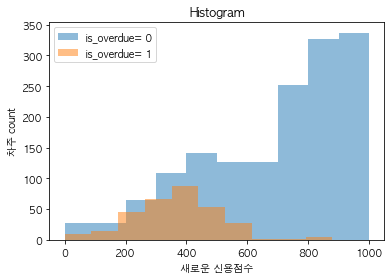

In [15]:
# Ïó∞Ï≤¥ Ïó¨Î∂Ä(is_overdue)Ïï† Îî∞Î•∏ Ï∞®Ï£ºÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
# ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàò(new_score)Í∞Ä ÎÇÆÏùÑÏàòÎ°ù Ïó∞Ï≤¥Ìïú Ï∞®Ï£º, ÎÜíÏùÑÏàòÎ°ù Ïó∞Ï≤¥ÌïòÏßÄ ÏïäÏùÄ Ï∞®Ï£ºÍ∞Ä ÏúÑÏπòÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏
df_test = pd.DataFrame({'new_score':new_score})
df_test['is_overdue'] = df_raw_y

plt.hist(df_test[df_test['is_overdue']==0]['new_score'], alpha=0.5, label='is_overdue= 0')
plt.hist(df_test[df_test['is_overdue']==1]['new_score'], alpha=0.5, label='is_overdue= 1')
plt.title('Histogram')
plt.ylabel('Ï∞®Ï£º count')
plt.xlabel('ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàò')
plt.legend()
plt.show()

# 5. ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®Ìòï Í∞úÎ∞ú: RFÎ™®Îç∏Î°ú ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Ìïú Ï∞®Ï£º Ïã†Ïö©Ï†êÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú 12Í∞úÏùò Îì±Í∏â Î∂ÄÏó¨

In [16]:
# 1. Í∏∞Ï°¥ Ïã†Ïö© Îì±Í∏â Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎà†Ï£ºÎäî Ìï®Ïàò
def cal_credit_class(new_score):    
    df = pd.DataFrame({'new_score':new_score})
    df['class'] = new_score
    df['is_overdue'] = df_raw_y
    crit=200 
    bin_ = round((max(new_score)-crit)/4, 0)
    print('bin size ', bin_)
    print(crit, bin_+crit)
    df.loc[df['new_score'] < crit, 'class'] = 'un_C03'
    df.loc[((df['new_score'] >= crit)&(df['new_score'] < bin_+crit)), 'class'] = 'C04'
    df.loc[((df['new_score'] >= bin_+crit)&(df['new_score'] < bin_*2+crit)), 'class'] = 'C05'
    df.loc[((df['new_score'] >= bin_*2+crit)&(df['new_score'] < bin_*3+crit)), 'class'] = 'C06'
    df.loc[(df['new_score'] >= bin_*3+crit), 'class'] = 'over_C07'
    return df

# 2. ÏÉàÎ°≠Í≤å ÎèÑÏ∂úÌïú Ïã†Ïö© Ï†êÏàòÎ•º 12Í∞úÏùò Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàÑÏñ¥Ï£ºÎäî Ìï®Ïàò
def cal_credit_class_div(new_score, classnum, lowerlimit):    
    df = pd.DataFrame({'chaju_id':df_raw['chaju_id'],'new_score':new_score})
    df['class'] = new_score
    df['is_overdue'] = df_raw_y
    crit = lowerlimit 
    bin_ = round((max(new_score)-crit)/(classnum), 0)
    print('ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞Ä Î™®ÌòïÏùò Îì±Í∏â Íµ¨Í∞Ñ ÌÅ¨Í∏∞ ', bin_)
    print('ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®ÌòïÏùò Í≥†Í∞ù ÏÑ∏Î∂ÑÌôîÎ•º ÏúÑÌïú Îì±Í∏â Íµ¨Í∞Ñ Ï†ïÏùò')
    for i in range(1,classnum+1):
        if i == 1:
            print(13-i,'Îì±Í∏â Ïù¥Ìïò', crit+bin_*(i))
            df.loc[df['new_score'] < crit+bin_*(i), 'class'] = str(13-i)+'Îì±Í∏â'
        elif i == classnum:
            print(13-i,'Îì±Í∏â Ïù¥ÏÉÅ', crit+bin_*(i-1))
            df.loc[df['new_score'] >= crit+bin_*(i-1), 'class'] = str(13-i)+'Îì±Í∏â'
        elif i > 1:
            print(crit+bin_*(i-1), 13-i, 'Îì±Í∏â', crit+bin_*(i))
            df.loc[(df['new_score'] >= crit+bin_*(i-1))&(df['new_score'] < crit+bin_*(i)), 'class'] = str(13-i)+'Îì±Í∏â'
    return df

# # 1. ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®ÌòïÍ≥º Í∏∞Ï°¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®ÌòïÏùÑ ÎπÑÍµêÌï† Í≤ΩÏö∞ ÏÇ¨Ïö©
# df_class = cal_credit_class(risk_score)

## 2. ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®Ìòï: ÏÉàÎ°úÏö¥ Î≥ÄÏàòÎì§Î°ú ÎèÑÏ∂úÌïú ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàòÎ•º 12Îì±Í∏âÏúºÎ°ú ÎÇòÎààÎã§.
df_class = cal_credit_class_div(new_score, 12, 30)
df_class

ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞Ä Î™®ÌòïÏùò Îì±Í∏â Íµ¨Í∞Ñ ÌÅ¨Í∏∞  81.0
ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®ÌòïÏùò Í≥†Í∞ù ÏÑ∏Î∂ÑÌôîÎ•º ÏúÑÌïú Îì±Í∏â Íµ¨Í∞Ñ Ï†ïÏùò
12 Îì±Í∏â Ïù¥Ìïò 111.0
111.0 11 Îì±Í∏â 192.0
192.0 10 Îì±Í∏â 273.0
273.0 9 Îì±Í∏â 354.0
354.0 8 Îì±Í∏â 435.0
435.0 7 Îì±Í∏â 516.0
516.0 6 Îì±Í∏â 597.0
597.0 5 Îì±Í∏â 678.0
678.0 4 Îì±Í∏â 759.0
759.0 3 Îì±Í∏â 840.0
840.0 2 Îì±Í∏â 921.0
1 Îì±Í∏â Ïù¥ÏÉÅ 921.0


chaju_id   new_score class  is_overdue
0      C-1001  399.305383   8Îì±Í∏â         1.0
1      C-1002  714.800382   4Îì±Í∏â         0.0
2      C-1003  653.363918   5Îì±Í∏â         0.0
3      C-1004  521.333251   6Îì±Í∏â         0.0
4      C-1005  656.442137   5Îì±Í∏â         0.0
...       ...         ...   ...         ...
1844   C-2995  300.492423   9Îì±Í∏â         0.0
1845   C-2996  737.580538   4Îì±Í∏â         0.0
1846   C-2998  986.823494   1Îì±Í∏â         0.0
1847   C-2999  897.978449   2Îì±Í∏â         0.0
1848   C-3000  348.538676   9Îì±Í∏â         0.0

[1849 rows x 4 columns]

In [17]:
# ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®ÌòïÏùò 12Îì±Í∏âÎ≥Ñ Ïó∞Ï≤¥Ïûê Ïàò
table=pd.crosstab(df_class['class'],df_class['is_overdue'], margins=True)
table

is_overdue   0.0  1.0   All
class                      
10Îì±Í∏â          47   47    94
11Îì±Í∏â          21   16    37
12Îì±Í∏â          31   12    43
1Îì±Í∏â          266    0   266
2Îì±Í∏â          256    2   258
3Îì±Í∏â          269    4   273
4Îì±Í∏â          159    0   159
5Îì±Í∏â           96    2    98
6Îì±Í∏â           99   32   131
7Îì±Í∏â          107   55   162
8Îì±Í∏â          107   79   186
9Îì±Í∏â           79   63   142
All         1537  312  1849

# 6. ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®Ìòï: KS ÌÜµÍ≥ÑÎüâ 65% Îã¨ÏÑ± (Í∏∞Ï°¥ ÎåÄÎπÑ 1.6% Ï¶ùÎåÄ)

In [18]:
# Îì±Í∏â ÏàúÏúºÎ°ú table Ï†ïÎ†¨

# 1. Í∏∞Ï°¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®ÌòïÍ≥º KS ÌÜµÍ≥ÑÎüâ ÎπÑÍµêÏãú ÏÇ¨Ïö©ÌïòÎäî table
# table = table.reindex(index=['un_C03','C04','C05','C06','over_C07','All'])

# 2. ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®Ìòï
# table = table.reindex(index=['1Îì±Í∏â Ïù¥ÏÉÅ', '2Îì±Í∏â', '3Îì±Í∏â', '4Îì±Í∏â', '5Îì±Í∏â', '6Îì±Í∏â', '7Îì±Í∏â', '8Îì±Í∏â', '9Îì±Í∏â', '10Îì±Í∏â', '11Îì±Í∏â', '12Îì±Í∏â Ïù¥Ìïò'])
table = table.reindex(index=['12Îì±Í∏â', '11Îì±Í∏â', '10Îì±Í∏â', '9Îì±Í∏â', '8Îì±Í∏â', '7Îì±Í∏â', '6Îì±Í∏â', '5Îì±Í∏â', '4Îì±Í∏â', '3Îì±Í∏â', '2Îì±Í∏â', '1Îì±Í∏â'])
table

is_overdue  0.0  1.0  All
class                    
12Îì±Í∏â         31   12   43
11Îì±Í∏â         21   16   37
10Îì±Í∏â         47   47   94
9Îì±Í∏â          79   63  142
8Îì±Í∏â         107   79  186
7Îì±Í∏â         107   55  162
6Îì±Í∏â          99   32  131
5Îì±Í∏â          96    2   98
4Îì±Í∏â         159    0  159
3Îì±Í∏â         269    4  273
2Îì±Í∏â         256    2  258
1Îì±Í∏â         266    0  266

In [19]:
# K-S ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú ÏÇ¨Ï†Ñ ÏûëÏóÖ
table['0_ratio']=table[0.0]/1537 # Ï†ÑÏ≤¥ Ï∞®Ï£º Ï§ë Ïó∞Ï≤¥ÌïòÏßÄ ÏïäÏùÄ 1537Î™Ö Ï§ëÏóê, Í∞Å Îì±Í∏âÎ≥Ñ Ïó∞Ï≤¥ÌïòÏßÄ ÏïäÏùÄ ÏÇ¨ÎûåÏùò ÎπÑÏú®
table['1_ratio']=table[1.0]/312 # Ï†ÑÏ≤¥ Ï∞®Ï£º Ï§ë Ïó∞Ï≤¥Ìïú 312Î™Ö Ï§ëÏóê, Í∞Å Îì±Í∏âÎ≥Ñ Ïó∞Ï≤¥Ìïú ÏÇ¨ÎûåÏùò ÎπÑÏú®
table

is_overdue  0.0  1.0  All   0_ratio   1_ratio
class                                        
12Îì±Í∏â         31   12   43  0.020169  0.038462
11Îì±Í∏â         21   16   37  0.013663  0.051282
10Îì±Í∏â         47   47   94  0.030579  0.150641
9Îì±Í∏â          79   63  142  0.051399  0.201923
8Îì±Í∏â         107   79  186  0.069616  0.253205
7Îì±Í∏â         107   55  162  0.069616  0.176282
6Îì±Í∏â          99   32  131  0.064411  0.102564
5Îì±Í∏â          96    2   98  0.062459  0.006410
4Îì±Í∏â         159    0  159  0.103448  0.000000
3Îì±Í∏â         269    4  273  0.175016  0.012821
2Îì±Í∏â         256    2  258  0.166558  0.006410
1Îì±Í∏â         266    0  266  0.173064  0.000000

In [20]:
# K-S ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú table ÏÉùÏÑ±
ks_table=table[['0_ratio','1_ratio']]
ks_table['index'] = ks_table.index
ks_table

<ipython-input-20-1167487acd2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_table['index'] = ks_table.index


is_overdue   0_ratio   1_ratio index
class                               
12Îì±Í∏â        0.020169  0.038462  12Îì±Í∏â
11Îì±Í∏â        0.013663  0.051282  11Îì±Í∏â
10Îì±Í∏â        0.030579  0.150641  10Îì±Í∏â
9Îì±Í∏â         0.051399  0.201923   9Îì±Í∏â
8Îì±Í∏â         0.069616  0.253205   8Îì±Í∏â
7Îì±Í∏â         0.069616  0.176282   7Îì±Í∏â
6Îì±Í∏â         0.064411  0.102564   6Îì±Í∏â
5Îì±Í∏â         0.062459  0.006410   5Îì±Í∏â
4Îì±Í∏â         0.103448  0.000000   4Îì±Í∏â
3Îì±Í∏â         0.175016  0.012821   3Îì±Í∏â
2Îì±Í∏â         0.166558  0.006410   2Îì±Í∏â
1Îì±Í∏â         0.173064  0.000000   1Îì±Í∏â

In [21]:
# K-S ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú ÎàÑÏ†ÅÌôïÎ•† Í≥ÑÏÇ∞
ks_table['0_cum']=  ks_table['0_ratio'].cumsum()
ks_table['1_cum']=  ks_table['1_ratio'].cumsum()
ks_table

<ipython-input-21-a5c983bc7f6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_table['0_cum']=  ks_table['0_ratio'].cumsum()


is_overdue   0_ratio   1_ratio index     0_cum     1_cum
class                                                   
12Îì±Í∏â        0.020169  0.038462  12Îì±Í∏â  0.020169  0.038462
11Îì±Í∏â        0.013663  0.051282  11Îì±Í∏â  0.033832  0.089744
10Îì±Í∏â        0.030579  0.150641  10Îì±Í∏â  0.064411  0.240385
9Îì±Í∏â         0.051399  0.201923   9Îì±Í∏â  0.115810  0.442308
8Îì±Í∏â         0.069616  0.253205   8Îì±Í∏â  0.185426  0.695513
7Îì±Í∏â         0.069616  0.176282   7Îì±Í∏â  0.255042  0.871795
6Îì±Í∏â         0.064411  0.102564   6Îì±Í∏â  0.319453  0.974359
5Îì±Í∏â         0.062459  0.006410   5Îì±Í∏â  0.381913  0.980769
4Îì±Í∏â         0.103448  0.000000   4Îì±Í∏â  0.485361  0.980769
3Îì±Í∏â         0.175016  0.012821   3Îì±Í∏â  0.660377  0.993590
2Îì±Í∏â         0.166558  0.006410   2Îì±Í∏â  0.826936  1.000000
1Îì±Í∏â         0.173064  0.000000   1Îì±Í∏â  1.000000  1.000000

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

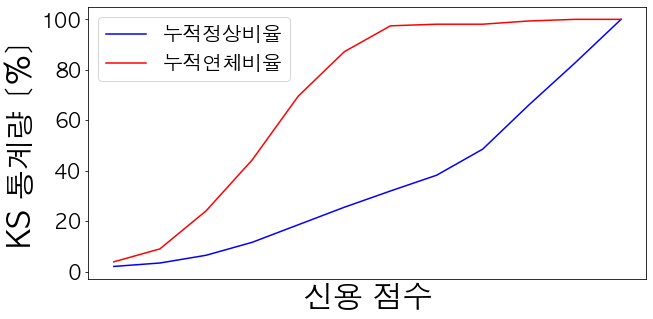

In [22]:
# ks_fin=ks_fin.drop(index=['All']) # 1.Í∏∞Ï°¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®ÌòïÍ≥º ÎπÑÍµêÌï† Í≤ΩÏö∞ allÏÇ≠Ï†ú ÌïÑÏöî
fs=30
plt.figure(figsize=(10,5))
plt.plot(ks_table['index'], ks_table['0_cum']*100,label='ÎàÑÏ†ÅÏ†ïÏÉÅÎπÑÏú®', c='b')
plt.plot(ks_table['index'],ks_table['1_cum']*100,label='ÎàÑÏ†ÅÏó∞Ï≤¥ÎπÑÏú®', c='r')
plt.legend(fontsize=fs-10)
plt.ylabel('KS ÌÜµÍ≥ÑÎüâ [%]',fontsize=fs)
plt.xlabel('Ïã†Ïö© Ï†êÏàò',fontsize=fs)
plt.xticks([])
plt.yticks(fontsize=fs-10)

## K-S ÌÜµÍ≥ÑÎüâ: 65%
### K-S ÌÜµÍ≥ÑÎüâ Ï†ïÏùò = $max(|ÎàÑÏ†ÅÎ∂àÎüâÍµ¨ÏÑ±ÎπÑ - ÎàÑÏ†ÅÏö∞ÎüâÍµ¨ÏÑ±ÎπÑ|)$

In [23]:
ks_value = round(abs(ks_table['1_cum']-ks_table['0_cum']).max(), 2)*100
ks_value

65.0

# 7. ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®ÌòïÍ≥º Í∏∞Ï°¥ Î™®ÌòïÏùò ÎπÑÍµê

## üìåÎ™©Ìëú: Í∏∞Ï°¥ Îì±Í∏âÏ†úÏóêÏÑúÎäî Îì±Í∏â Í∞ÑÏùò Î≥ÄÎ≥ÑÎ†• ÏïΩÌôîÎ°ú Ïù∏Ìï¥ ÎåÄÏ∂ú Ïã¨ÏÇ¨ Î∂àÏù¥ÏùµÏùÑ Î∞õÎçò, Ïù¥ÌÉàÏú® ÎÜíÏùÄ ‚ÄúÏ†ÄÏúÑÌóò-Í≥†ÏàòÏùµ Ï∞®Ï£º‚Äù Î∞úÍµ¥

#### "Ï†ÄÏúÑÌóò-Í≥†ÏàòÏùµ Ï∞®Ï£º"ÎûÄ?: ÎåÄÏ∂ú Ïù¥ÌõÑ Ïó∞Ï≤¥ÌïòÏßÄ ÏïäÏùÄ Ï†ÄÏúÑÌóò-Í≥†ÏàòÏùµ Í≥†Í∞ù

### Í∏∞Ï°¥ Î™®ÌòïÏùò Îì±Í∏â Íµ¨Í∞Ñ

In [24]:
# df_raw = pd.read_csv('wo_thin.csv', engine='python', encoding='cp949')
df = pd.read_csv('df_final.csv', engine='python')

df_y=df["is_overdue"]
df_x=df.drop("is_overdue",axis=1,inplace=False)

table=pd.crosstab(df['credit_class'],df['is_overdue'], margins=True)
table

is_overdue     0.0  1.0   All
credit_class                 
C02              2    2     4
C03            106   12   118
C04            513   54   567
C05            625   88   713
C06            270   78   348
C07             21   56    77
C08              0   18    18
C09              0    4     4
All           1537  312  1849

### Í∏∞Ï°¥ Î™®ÌòïÏóêÏÑú Ï†ÄÏã†Ïö© Ï∞®Ï£º (7Îì±Í∏â Ïù¥Ìïò)Ïùò Ïó∞Ï≤¥ Ïó¨Î∂Ä ÌôïÏù∏

In [25]:
low_class = df[(df['credit_class']=='C07')|(df['credit_class']=='C08')|(df['credit_class']=='C09')]
low_class_7 = df[(df['credit_class']=='C07')]
low_class_8 = df[(df['credit_class']=='C08')]
low_class_9 = df[(df['credit_class']=='C09')]

In [26]:
low_class_table=pd.crosstab(low_class['credit_class'],low_class['is_overdue'], margins=True)
low_class_table

is_overdue    0.0  1.0  All
credit_class               
C07            21   56   77
C08             0   18   18
C09             0    4    4
All            21   78   99

In [27]:
low_class_7_table=pd.crosstab(low_class_7['credit_class'],low_class_7['is_overdue'], margins=True)
low_class_8_table=pd.crosstab(low_class_8['credit_class'],low_class_8['is_overdue'], margins=True)
low_class_9_table=pd.crosstab(low_class_9['credit_class'],low_class_9['is_overdue'], margins=True)

## üìå ÌÉÄÍ≤ü Í≥†Í∞ù ÏÑ§Ï†ï: Í∏∞Ï°¥ Ïã†Ïö© Îì±Í∏â 7Îì±Í∏â Ï∞®Ï£º Ï§ë ÎåÄÏ∂ú Ïù¥ÌõÑ Ïó∞Ï≤¥ÌïòÏßÄ ÏïäÏùÄ Ï∞®Ï£º
##  (7Îì±Í∏â Í≥†Í∞ùÏùò 27%)

In [28]:
new_customer = low_class_7[low_class_7['is_overdue']==0.0]
new_customer.head(n=1)

chaju_id credit_class  score_risk gender  age agegroup     job      edu  \
53   C-1056          C07         608     ÎÇ®ÏÑ±   42      40ÎåÄ  Í∏∞Îä•/ÎÖ∏Î¨¥ÏßÅ  Í≥†Îì±ÌïôÍµê Ï°∏ÏóÖ   

   dwell_type house_type marriage income_home_grp income_ind_grp  \
53         ÏõîÏÑ∏       Ïò§ÌîºÏä§ÌÖî       ÎØ∏Ìòº       300-399ÎßåÏõê      300-399ÎßåÏõê   

   expenditure_grp child_cd  no_child flag_priv_biz_cd  net_income  \
53       100-199ÎßåÏõê        Y         0                N         200   

    family_size  income_person  card_count  loan_amt  loan_dur  loan_count  \
53            1          200.0         4.0    2800.0       7.0         1.0   

    over_amt  over_dur  over_count  is_overdue  sum_loan_at_time  \
53       0.0       0.0         0.0         0.0            2800.0   

    sum_cashservice_3y  sum_cardloan_3y  no_cashservice_3y  no_cardloan_3y  \
53                 0.0              0.0                0.0             0.0   

    no_creditcard_over  sum_creditcard_over  max_loan_amt  max_over_amt  \
53                 0.0                  0.0        2800.0           0.0   

    income_ind_test  expend_ind_test  ind_net_income  loan_at_time_div_by_net  \
53              350              150             200                  1.17407   

    cardloan_no_diff_com  cashservice_no_diff_com  
53                   0.0                      0.0

### Í∏∞Ï°¥ Î™®ÌòïÏóêÏÑú Ïã†Ïö© Îì±Í∏â 7Îì±Í∏â Ï∞®Ï£º Ï§ë Ïó∞Ï≤¥ÌïòÏßÄ ÏïäÏùÄ Ï∞®Ï£ºÏùò ÌäπÏßï ÌååÏïÖ (EDA)

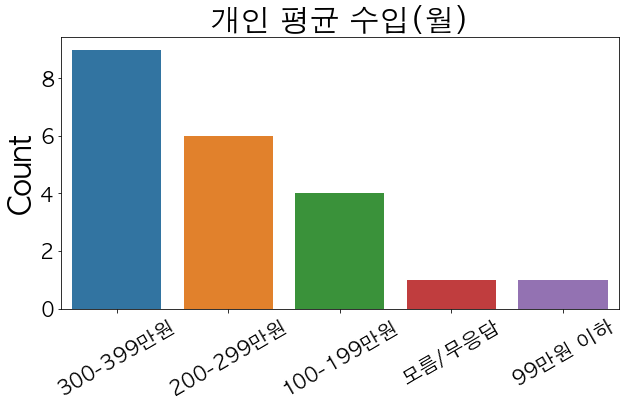

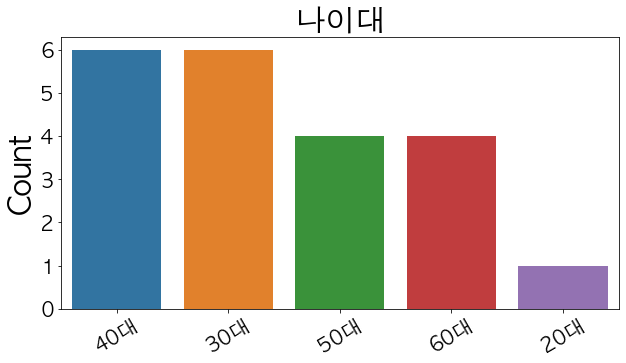

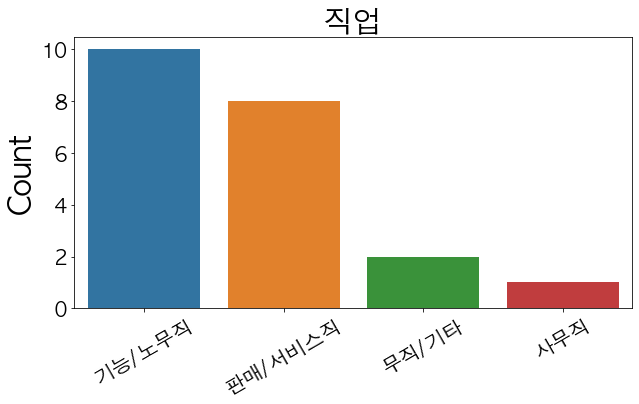

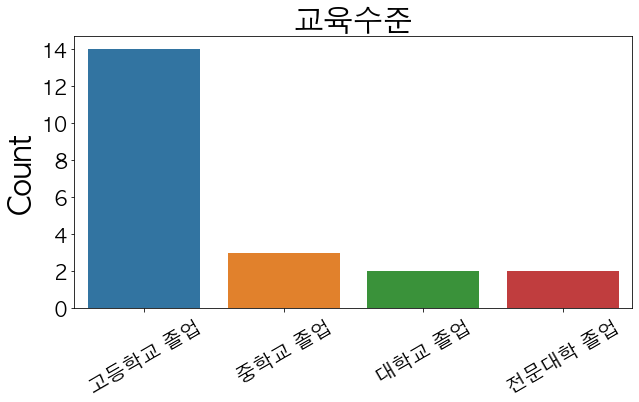

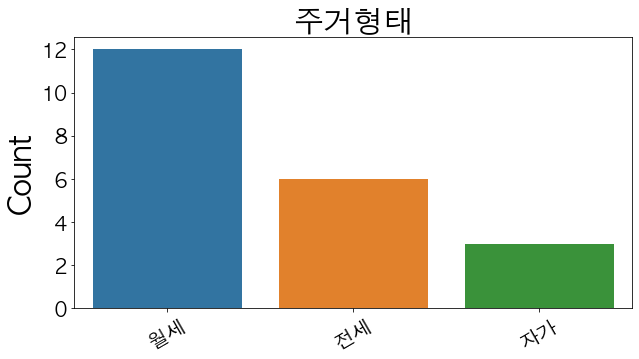

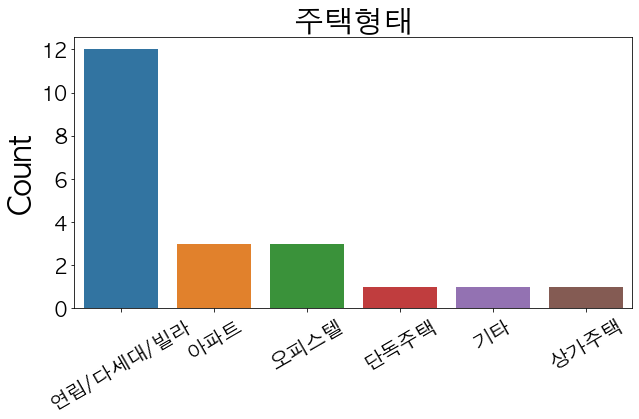

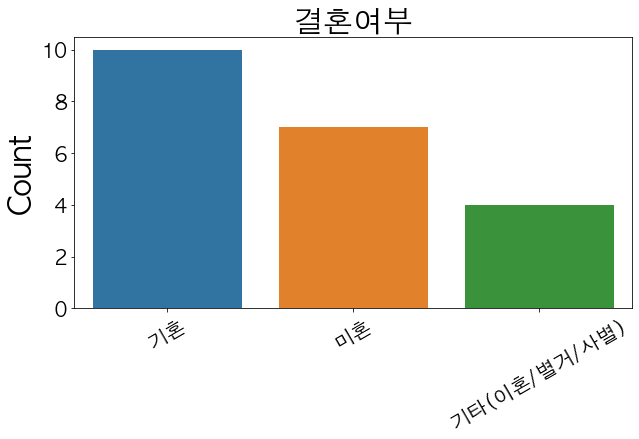

In [29]:
name = ['Í∞úÏù∏ ÌèâÍ∑† ÏàòÏûÖ(Ïõî)','ÎÇòÏù¥ÎåÄ', 'ÏßÅÏóÖ', 'ÍµêÏú°ÏàòÏ§Ä', 'Ï£ºÍ±∞ÌòïÌÉú', 'Ï£ºÌÉùÌòïÌÉú','Í≤∞ÌòºÏó¨Î∂Ä']
for i, n in zip(['income_ind_grp','agegroup','job','edu','dwell_type','house_type','marriage'], name):
    fs=30
    plt.figure(figsize=(10,5))
    sns.countplot(x=new_customer[i], order=new_customer[i].value_counts().index)
    plt.title(n, fontsize=fs)
    plt.ylabel('Count',fontsize=fs)
    plt.xlabel('',fontsize=0)
    plt.xticks(fontsize =fs-10, rotation=30)
    plt.yticks(fontsize =fs-10)
    plt.show()
    plt.close()

### Í∏∞Ï°¥ Î™®ÌòïÏóêÏÑú Ïã†Ïö© Îì±Í∏â 7Îì±Í∏â Ï∞®Ï£º Ï§ë Ïó∞Ï≤¥ÌïòÏßÄ ÏïäÏùÄ Ï∞®Ï£ºÏóê ÎåÄÌïú Í∏∞Ï°¥+ÏÉà Ïã†Ïö© Ï†êÏàò, Îì±Í∏â dataframe ÏÉùÏÑ±

In [30]:
new_cust_id = list(new_customer['chaju_id'].values)

df_new_cust = pd.DataFrame({'chaju_id':new_cust_id})
df_new_cust['before_safe_score'] = df_new_cust['chaju_id']
df_new_cust['after_safe_score'] = df_new_cust['chaju_id']
df_new_cust['before_class'] = df_new_cust['chaju_id']
df_new_cust['after_class'] = df_new_cust['chaju_id']
 
for i in range(len(df_new_cust)):
    before_safe_score = 1000-df_raw[df_raw['chaju_id']==df_new_cust['chaju_id'][i]]['score_risk'].values[0]
    df_new_cust['before_safe_score'][i]=before_safe_score
    df_new_cust['after_safe_score'][i]=df_class[df_class['chaju_id']==df_new_cust['chaju_id'][i]]['new_score'].values[0]
    df_new_cust['before_class'][i]=df_raw[df_raw['chaju_id']==df_new_cust['chaju_id'][i]]['credit_class'].values[0]
    df_new_cust['after_class'][i]=df_class[df_class['chaju_id']==df_new_cust['chaju_id'][i]]['class'].values[0]

df_new_cust

chaju_id before_safe_score after_safe_score before_class after_class
0    C-1056               392          790.767          C07         3Îì±Í∏â
1    C-1225               322          443.616          C07         7Îì±Í∏â
2    C-1240               369          467.947          C07         7Îì±Í∏â
3    C-1266               392          557.434          C07         6Îì±Í∏â
4    C-1276               302          7.19946          C07        12Îì±Í∏â
5    C-1299               352           406.12          C07         8Îì±Í∏â
6    C-1322               359          435.245          C07         7Îì±Í∏â
7    C-1335               302          397.257          C07         8Îì±Í∏â
8    C-1342               379          244.526          C07        10Îì±Í∏â
9    C-1377               389          404.491          C07         8Îì±Í∏â
10   C-1405               372          377.858          C07         8Îì±Í∏â
11   C-1573               382          479.478          C07         7Îì±Í∏â
12   C-1681               392          438.223          C07         7Îì±Í∏â
13   C-1887               342          535.725          C07         6Îì±Í∏â
14   C-2099               382       0.00222388          C07        12Îì±Í∏â
15   C-2214               396          776.359          C07         3Îì±Í∏â
16   C-2383               336          237.907          C07        10Îì±Í∏â
17   C-2832               395          754.637          C07         4Îì±Í∏â
18   C-2849               396          528.545          C07         6Îì±Í∏â
19   C-2946               392          585.579          C07         6Îì±Í∏â
20   C-2980               386          531.099          C07         6Îì±Í∏â

### "Îì±Í∏â Î≥ÄÌôî(dif_class) = ÏÉàÎ°úÏö¥ Îì±Í∏â - Í∏∞Ï°¥ Îì±Í∏â" ÌôïÏù∏
### ÏùòÎØ∏:
#### Îì±Í∏â Î≥ÄÌôî>0 => Îçî ÏúÑÌóòÌïú Ï∞®Ï£ºÎ°ú Î∂ÑÎ•ò

#### Îì±Í∏â Î≥ÄÌôî<0 => Îçî ÏïàÏ†ÑÌïú Ï∞®Ï£ºÎ°ú Î∂ÑÎ•ò

In [31]:
df_new_cust['dif_class'] = df_new_cust['after_class']

df_new_cust['dif_class'] = df_new_cust['after_class'].apply(lambda x: x[0] if x=='1Îì±Í∏â' else x[:-2])
df_new_cust['dif_class'] = df_new_cust['dif_class'].apply(lambda x: int(x) - 7)
df_new_cust

chaju_id before_safe_score after_safe_score before_class after_class  \
0    C-1056               392          790.767          C07         3Îì±Í∏â   
1    C-1225               322          443.616          C07         7Îì±Í∏â   
2    C-1240               369          467.947          C07         7Îì±Í∏â   
3    C-1266               392          557.434          C07         6Îì±Í∏â   
4    C-1276               302          7.19946          C07        12Îì±Í∏â   
5    C-1299               352           406.12          C07         8Îì±Í∏â   
6    C-1322               359          435.245          C07         7Îì±Í∏â   
7    C-1335               302          397.257          C07         8Îì±Í∏â   
8    C-1342               379          244.526          C07        10Îì±Í∏â   
9    C-1377               389          404.491          C07         8Îì±Í∏â   
10   C-1405               372          377.858          C07         8Îì±Í∏â   
11   C-1573               382          479.478          C07         7Îì±Í∏â   
12   C-1681               392          438.223          C07         7Îì±Í∏â   
13   C-1887               342          535.725          C07         6Îì±Í∏â   
14   C-2099               382       0.00222388          C07        12Îì±Í∏â   
15   C-2214               396          776.359          C07         3Îì±Í∏â   
16   C-2383               336          237.907          C07        10Îì±Í∏â   
17   C-2832               395          754.637          C07         4Îì±Í∏â   
18   C-2849               396          528.545          C07         6Îì±Í∏â   
19   C-2946               392          585.579          C07         6Îì±Í∏â   
20   C-2980               386          531.099          C07         6Îì±Í∏â   

    dif_class  
0          -4  
1           0  
2           0  
3          -1  
4           5  
5           1  
6           0  
7           1  
8           3  
9           1  
10          1  
11          0  
12          0  
13         -1  
14          5  
15         -4  
16          3  
17         -3  
18         -1  
19         -1  
20         -1

### Ïã†Ïö© Ï†êÏàò Î≥ÄÌôî(dif_score) ÌôïÏù∏

In [32]:
df_new_cust['dif_score'] = df_new_cust['after_safe_score']
df_new_cust['dif_score'] = df_new_cust['after_safe_score']-df_new_cust['before_safe_score']
df_new_cust

chaju_id before_safe_score after_safe_score before_class after_class  \
0    C-1056               392          790.767          C07         3Îì±Í∏â   
1    C-1225               322          443.616          C07         7Îì±Í∏â   
2    C-1240               369          467.947          C07         7Îì±Í∏â   
3    C-1266               392          557.434          C07         6Îì±Í∏â   
4    C-1276               302          7.19946          C07        12Îì±Í∏â   
5    C-1299               352           406.12          C07         8Îì±Í∏â   
6    C-1322               359          435.245          C07         7Îì±Í∏â   
7    C-1335               302          397.257          C07         8Îì±Í∏â   
8    C-1342               379          244.526          C07        10Îì±Í∏â   
9    C-1377               389          404.491          C07         8Îì±Í∏â   
10   C-1405               372          377.858          C07         8Îì±Í∏â   
11   C-1573               382          479.478          C07         7Îì±Í∏â   
12   C-1681               392          438.223          C07         7Îì±Í∏â   
13   C-1887               342          535.725          C07         6Îì±Í∏â   
14   C-2099               382       0.00222388          C07        12Îì±Í∏â   
15   C-2214               396          776.359          C07         3Îì±Í∏â   
16   C-2383               336          237.907          C07        10Îì±Í∏â   
17   C-2832               395          754.637          C07         4Îì±Í∏â   
18   C-2849               396          528.545          C07         6Îì±Í∏â   
19   C-2946               392          585.579          C07         6Îì±Í∏â   
20   C-2980               386          531.099          C07         6Îì±Í∏â   

    dif_class dif_score  
0          -4   398.767  
1           0   121.616  
2           0   98.9468  
3          -1   165.434  
4           5  -294.801  
5           1   54.1198  
6           0    76.245  
7           1   95.2569  
8           3  -134.474  
9           1   15.4908  
10          1   5.85835  
11          0   97.4779  
12          0   46.2226  
13         -1   193.725  
14          5  -381.998  
15         -4   380.359  
16          3  -98.0929  
17         -3   359.637  
18         -1   132.545  
19         -1   193.579  
20         -1   145.099

# üìåÍ∏∞Ï°¥ Î™®ÌòïÏóêÏÑú 7Îì±Í∏â Ï∞®Ï£ºÎ°ú Î∂ÑÎ•òÎêòÏóàÏßÄÎßå Ïó∞Ï≤¥ÌïòÏßÄ ÏïäÏùÄ Ï∞®Ï£º Ï§ëÏóêÏÑú 
# ÏÉàÎ°úÏö¥ Î™®ÌòïÏóêÏÑú Îì±Í∏âÏù¥ ÏÉÅÏäπÌïòÏó¨ Í∏∞Ï°¥ Ïã†Ïö©ÌèâÍ∞ÄÎ™®ÌòïÏúºÎ°ú Ïù∏Ìïú Î∂àÏù¥ÏùµÏù¥ Ìï¥ÏÜåÎêú Ï∞®Ï£º

Îì±Í∏â ÏÉÅÏäπ & Ï†êÏàò ÏÉÅÏäπÌïú Ï∞®Ï£º

In [33]:
df_new_cust[df_new_cust['dif_class']<0]

chaju_id before_safe_score after_safe_score before_class after_class  \
0    C-1056               392          790.767          C07         3Îì±Í∏â   
3    C-1266               392          557.434          C07         6Îì±Í∏â   
13   C-1887               342          535.725          C07         6Îì±Í∏â   
15   C-2214               396          776.359          C07         3Îì±Í∏â   
17   C-2832               395          754.637          C07         4Îì±Í∏â   
18   C-2849               396          528.545          C07         6Îì±Í∏â   
19   C-2946               392          585.579          C07         6Îì±Í∏â   
20   C-2980               386          531.099          C07         6Îì±Í∏â   

    dif_class dif_score  
0          -4   398.767  
3          -1   165.434  
13         -1   193.725  
15         -4   380.359  
17         -3   359.637  
18         -1   132.545  
19         -1   193.579  
20         -1   145.099

Îì±Í∏â Î≥ÄÌôîÎäî ÏóÜÏßÄÎßå Ï†êÏàò ÏÉÅÏäπÌïú Ï∞®Ï£º

In [34]:
df_new_cust[df_new_cust['dif_class']==0]

chaju_id before_safe_score after_safe_score before_class after_class  \
1    C-1225               322          443.616          C07         7Îì±Í∏â   
2    C-1240               369          467.947          C07         7Îì±Í∏â   
6    C-1322               359          435.245          C07         7Îì±Í∏â   
11   C-1573               382          479.478          C07         7Îì±Í∏â   
12   C-1681               392          438.223          C07         7Îì±Í∏â   

    dif_class dif_score  
1           0   121.616  
2           0   98.9468  
6           0    76.245  
11          0   97.4779  
12          0   46.2226

Îì±Í∏â ÌïòÎùΩÌïú Ï∞®Ï£º

In [35]:
df_new_cust[df_new_cust['dif_class']>0]

chaju_id before_safe_score after_safe_score before_class after_class  \
4    C-1276               302          7.19946          C07        12Îì±Í∏â   
5    C-1299               352           406.12          C07         8Îì±Í∏â   
7    C-1335               302          397.257          C07         8Îì±Í∏â   
8    C-1342               379          244.526          C07        10Îì±Í∏â   
9    C-1377               389          404.491          C07         8Îì±Í∏â   
10   C-1405               372          377.858          C07         8Îì±Í∏â   
14   C-2099               382       0.00222388          C07        12Îì±Í∏â   
16   C-2383               336          237.907          C07        10Îì±Í∏â   

    dif_class dif_score  
4           5  -294.801  
5           1   54.1198  
7           1   95.2569  
8           3  -134.474  
9           1   15.4908  
10          1   5.85835  
14          5  -381.998  
16          3  -98.0929

Í∏∞Ï°¥ Îì±Í∏âÏ†úÎ™®Ìòï 7Îì±Í∏â Ï†ÑÏ≤¥ Ï∞®Ï£º Ï§ë Ï†êÏàò ÏÉÅÏäπÌïú Ï∞®Ï£º: 22.1%

In [36]:
len(df_new_cust[df_new_cust['dif_score']>0])/77

0.22077922077922077

## üìå Í∏∞Ï°¥ Îì±Í∏âÏ†úÎ™®Ìòï 7Îì±Í∏â Ï∞®Ï£º Ï§ë Î∂àÏù¥Ïùµ Î∞õÏïòÎçò Ï∞®Ï£º Ï§ë Ï†êÏàò ÏÉÅÏäπÌïú Ï∞®Ï£º: 81.0%

In [37]:
len(df_new_cust[df_new_cust['dif_score']>0])/21

0.8095238095238095

## üìå Í∏∞Ï°¥ Îì±Í∏âÏ†úÎ™®Ìòï 7Îì±Í∏â Ï∞®Ï£º Ï§ë Î∂àÏù¥Ïùµ Î∞õÏïòÎçò Ï∞®Ï£ºÏùò ÌèâÍ∑† ÏÉÅÏäπ Ï†êÏàò: 152Ï†ê
Ïù¥Îì§Ïùò Ïã†Ïö©Ï†êÏàòÎäî ÏµúÏÜå 5.8Ï†êÏóêÏÑú ÏµúÎåÄ 399Ï†ê ÏÉÅÏäπ

In [38]:
np.mean(list(df_new_cust[df_new_cust['dif_score']>0]['dif_score'].values))

151.78703032842938

In [39]:
min(list(df_new_cust[df_new_cust['dif_score']>0]['dif_score'].values))

5.858348779895664

In [40]:
max(list(df_new_cust[df_new_cust['dif_score']>0]['dif_score'].values))

398.76724756096075

## Í∏∞Ï°¥ Îì±Í∏âÏ†úÎ™®Ìòï 7Îì±Í∏â Ï∞®Ï£º Ï§ë Î∂àÏù¥Ïùµ Î∞õÏïòÎçò Ï∞®Ï£ºÏùò ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàò Î∂ÑÌè¨
Ïù¥Îì§Ïùò ÏÉàÎ°úÏö¥ Ïã†Ïö©Ï†êÏàòÎäî ÏµúÏÜå 378Ï†êÏóêÏÑú ÏµúÎåÄ 791Ï†ê

377.85834877989566
790.7672475609608


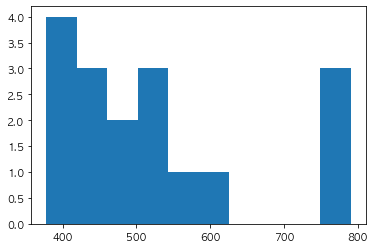

In [41]:
print(min(list(df_new_cust[df_new_cust['dif_score']>0]['after_safe_score'].values)))
print(max(list(df_new_cust[df_new_cust['dif_score']>0]['after_safe_score'].values)))
plt.hist(list(df_new_cust[df_new_cust['dif_score']>0]['after_safe_score'].values))
plt.show()

Ïù¥Îì§Ïùò Í∏∞Ï°¥ Îì±Í∏âÏ†úÎ™®ÌòïÏóêÏÑúÏùò Ï†êÏàò Î∂ÑÌè¨Îäî ÏµúÏÜå 302Ï†êÏóêÏÑú ÏµúÎåÄ 396Ï†ê

302
396


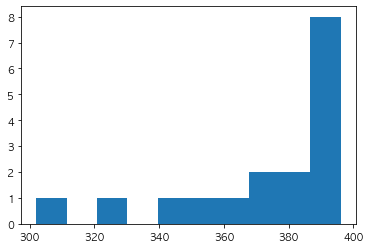

In [42]:
print(min(list(df_new_cust[df_new_cust['dif_score']>0]['before_safe_score'].values)))
print(max(list(df_new_cust[df_new_cust['dif_score']>0]['before_safe_score'].values)))
plt.hist(list(df_new_cust[df_new_cust['dif_score']>0]['before_safe_score'].values))
plt.show()

## Í∏∞Ï°¥ Îì±Í∏âÏ†úÎ™®Ìòï 7Îì±Í∏â Ï∞®Ï£º Ï§ë Î∂àÏù¥Ïùµ Î∞õÏïòÎçò Ï∞®Ï£ºÏùò ÌèâÍ∑† ÏÉÅÏäπ Îì±Í∏â: 0.7Îì±Í∏â

In [43]:
np.mean(list(df_new_cust[df_new_cust['dif_score']>0]['dif_class'].values))

-0.7058823529411765

# üìå 8. ÏÉàÎ°úÏö¥ Ïã†Ïö©ÌèâÍ∞Ä Î™®ÌòïÏóêÏÑú Ï∞®Ï£ºÏùò ÎåÄÏ∂ú ÏäπÏù∏/Í±∞Ï†à ÏÇ¨Ïú† ÎèÑÏ∂ú 
## Shap value Î∂ÑÏÑù ÏÇ¨Ïö©

[Ïû•Ï†ê]

1. ensemble model Î≥ÄÌôîÏóê ÏÉÅÍ¥ÄÏóÜÎäî ÏùºÍ¥ÄÏÑ± ÎÜíÏùÄ Î≥ÄÏàò Ï§ëÏöîÎèÑ ÎèÑÏ∂ú Í∏∞Îä•

2. black box Î™®Îç∏ÏóêÏÑú Ïïå Ïàò ÏóÜÎäî Î≥ÄÏàòÍ∞Ä Î™©ÌëúÎ≥ÄÏàòÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïùò Î∞©Ìñ•ÏÑ±(Ïñë/Ïùå)ÏùÑ Ï†úÍ≥µ

# Ìï¥ÏÑù Î∞©Î≤ï
Í∞Å Ï∞®Ï£ºÎßàÎã§ ÏÑ§Î™ÖÎ≥ÄÏàòÍ∞Ä ÏòÅÌñ•ÏùÑ ÎÅºÏπòÎäî Í≤É ÌôïÏù∏ÌïòÎäî Í∑∏ÎûòÌîÑ

Îπ®Í∞ÑÏÉâÏù¥ Î™©ÌëúÎ≥ÄÏàòÍ∞Ä 0.75Í∞íÏùÑ Í∞ÄÏßÄÎäîÎç∞ Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπú Î≥ÄÏàò

ÌååÎûÄÏÉâÏù¥ Î™©ÌëúÎ≥ÄÏàòÍ∞Ä 0.03Ïù∏ Í∞íÏùÑ Í∞ÄÏßÄÎäîÎç∞ Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπú Î≥ÄÏàò

### Ïó∞Ï≤¥ ÌôïÎ•†Ïù¥ ÎÜíÍ≤å ÏòàÏ∏°Îêú Ï∞®Ï£ºÏùò ÏõêÏù∏ Î∂ÑÏÑù
Ïó∞Ï≤¥ Í∏∞Í∞Ñ, Ïó∞Ï≤¥ ÌöüÏàò, Ïó∞Ï≤¥ Í∏àÏï°Ïù¥ ÎÜíÍ∏∞ ÎïåÎ¨∏

In [50]:
import shap
explainer = shap.TreeExplainer(rf_final)

choosen_instance = df_train_x.iloc[1]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

### Ïó∞Ï≤¥ ÌôïÎ•†Ïù¥ ÎÇÆÍ≤å ÏòàÏ∏°Îêú Ï∞®Ï£ºÏùò ÏõêÏù∏ Î∂ÑÏÑù
Ïó∞Ï≤¥ Í∏∞Í∞Ñ, Ïó∞Ï≤¥ ÌöüÏàòÍ∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏

In [51]:
choosen_instance = df_train_x.iloc[6] 
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)